In [5]:
# Project due Monday Nov, 20th
# Plot project filter to first 90 days

import os
os.path.isfile('C:/Users/cmagann/Desktop/GA_DS/Homework/Iowa Project/Iowa_Liquor_sample.csv') 

#slice, aggregate, etc. for items of interest

True

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries import converter as pdtc
import matplotlib.units as munits
import numpy as np
munits.registry[np.datetime64] = pdtc.DatetimeConverter()
import seaborn as sns
from scipy import stats

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

In [7]:
lq = pd.read_csv('C:/Users/cmagann/Desktop/GA_DS/Homework/Iowa Project/Iowa_Liquor_sample.csv')

In [8]:
# Option 1: adjust pd.read_csv
lq = pd.read_csv('Iowa_Liquor_sample.csv',parse_dates=['Date'],infer_datetime_format=True)

In [9]:
# Option 2: convert the 'Date' column
lq['Date'] = pd.to_datetime(lq['Date'],errors = 'coerce',infer_datetime_format = True)

In [10]:
# remove spaces
lq.columns = lq.columns.str.replace(' ','')

In [11]:
# remove both left and right parentheses
lq.columns = lq.columns.str.replace('(','')
lq.columns = lq.columns.str.replace(')','')
lq.columns.values

array(['Date', 'StoreNumber', 'City', 'ZipCode', 'CountyNumber', 'County',
       'Category', 'CategoryName', 'VendorNumber', 'ItemNumber',
       'ItemDescription', 'BottleVolumeml', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars',
       'VolumeSoldLiters', 'VolumeSoldGallons'], dtype=object)

In [12]:
lq['StateBottleCost'] = lq['StateBottleCost'].apply(lambda x: x.replace('$',''))
lq['StateBottleRetail'] = lq['StateBottleRetail'].apply(lambda x: x.replace('$',''))
lq['SaleDollars'] = lq['SaleDollars'].apply(lambda x: x.replace('$',''))

lq['StateBottleCost'] = pd.to_numeric(lq['StateBottleCost'],errors='coerce')
lq['StateBottleRetail'] = pd.to_numeric(lq['StateBottleRetail'],errors='coerce')
lq['SaleDollars'] = pd.to_numeric(lq['SaleDollars'],errors='coerce')

In [13]:
#Remove rows containing any null values 
#Research indicates the null values are such a small percentage that the removal will be non impactful to the model
lq = lq.dropna(how = 'any')

In [14]:
lq[('CountyNumber')] = lq[('CountyNumber')].astype(int)

In [15]:
lq[('Category')] = lq[('Category')].astype(int)

In [16]:
lq[('SaleDollars')] = lq[('SaleDollars')].astype(int)

In [17]:
# convert string/object columns to numeric
lq['CountyNumber'] = pd.to_numeric(lq['CountyNumber'], errors='coerce')

In [18]:
lq.dtypes

Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                      object
CountyNumber                  int32
County                       object
Category                      int32
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost             float64
StateBottleRetail           float64
BottlesSold                   int64
SaleDollars                   int32
VolumeSoldLiters            float64
VolumeSoldGallons           float64
dtype: object

In [29]:
for item in lq:
    print item
    print lq[item].nunique()

Date
274
StoreNumber
1377
City
382
ZipCode
412
CountyNumber
99
County
99
Category
72
CategoryName
71
VendorNumber
115
ItemNumber
2669
ItemDescription
2150
BottleVolumeml
29
StateBottleCost
1073
StateBottleRetail
1098
BottlesSold
57
SaleDollars
843
VolumeSoldLiters
138
VolumeSoldGallons
134


In [30]:
lq.ItemDescription.value_counts()

Black Velvet                             7087
Hawkeye Vodka                            6649
Five O'clock Vodka                       4492
Smirnoff Vodka 80 Prf                    3407
Seagrams 7 Crown Bl Whiskey              3261
Captain Morgan Spiced Rum                3158
Fireball Cinnamon Whiskey                3033
Jack Daniels Old #7 Black Lbl            2976
Absolut Swedish Vodka 80 Prf             2834
Admiral Nelson Spiced Rum                2785
Bacardi Superior Rum                     2766
Jim Beam                                 2676
Mccormick Vodka Pet                      2505
Jagermeister Liqueur                     2330
Five Star                                2283
Paramount White Rum                      2254
Grey Goose Vodka                         2189
Crown Royal Canadian Whisky              2162
Jose Cuervo Especial Reposado Tequila    2155
Southern Comfort                         2066
Uv Blue (raspberry) Vodka                2060
Malibu Coconut Rum                

In [ ]:
# Drop selected columns
# lq = lq.drop('', axis=1)

In [ ]:
# First plotting attempts below (really bad)

In [ ]:
lq.groupby('Date').SaleDollars.mean()
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14
ax = lq.plot(kind='bar', y = 'SaleDollars', x = 'Date')
ax.set_xlim(pd.Timestamp('2015-01-05'), pd.Timestamp('2015-03-01'))

In [ ]:
lq.groupby('Date').SaleDollars.sum()
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14
ax = lq.plot(kind='line', y = 'SaleDollars', x = 'Date')
ax.set_xlim(pd.Timestamp('2015-01-05'), pd.Timestamp('2015-03-01'))

In [ ]:
#plt.plot(lq["Date"], lq["Open"], label="Open")
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14
plt.plot(lq['Date'], lq['SaleDollars'], label='SD')
plt.xlabel('Date')
plt.ylabel('SD')
plt.title('Sales')
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14
lq.SaleDollars.plot(kind='box')

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 14
lq.boxplot(column='SaleDollars', by='Date')

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 14
ax = lq.plot(kind='line', y = 'SaleDollars', x = 'Date')
ax.set_xlim(pd.Timestamp('2015-01-05'), pd.Timestamp('2015-03-01'))

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 14
sns.pairplot(lq)

In [ ]:
ax.set_xlim(pd.Timestamp('2015-02-15'), pd.Timestamp('2015-07-01'))

In [ ]:
lq.County.describe()

In [ ]:
lq.City.describe()

In [ ]:
lq.SalesDollars.sum()

In [ ]:
lq.CategoryName.describe()

In [35]:
# Start of lq2 df

In [231]:
# Set date range of df - trials
    # lq = pd.date_range('20150105', periods=90)
    # lq2 = lq[(lq['Date'] > '2015-01-04') & (lq['Date'] < '2015-04-01')]
    # lq.groupby([lq['Date'].dt.month])
    # lq2 = lq['Date'].dt.month
    # lq = pd.date_range('1/5/2015', periods=30, freq='M')
    # lq['Month'] = lq.Date.dt.month < # creates a new column "month" in the lq dataframe
    # lq2[lq.Month <= 3] < # have to create a new df to do filtering
    # lq2.groupby('Month').sum()  < # sums the 3 months in the new df, lq2 together

In [39]:
# creates a new column "month" in the lq dataframe
lq['Month'] = lq.Date.dt.month

In [55]:
# have to create a new df to do filtering
lq2 = lq[lq.Month <= 15]

In [56]:
# lq2 groupby month
lq2.groupby('Month').sum()

,StoreNumber,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
Month,,,,,,,,,,,,
1,113154315,1807676.0,3.293176e+10,8128681,1455392726,29125000,304448.09,457052.25,260418,3136915.0,224049.05,59193.53
2,114407941,1837952.0,3.328959e+10,8142310,1478338617,29485575,309158.01,464268.02,267348,3229589.0,231575.39,61182.87
3,130391649,2078245.0,3.779394e+10,9355657,1653765178,33494650,350605.47,526311.57,304978,3665491.0,260159.13,68733.98
4,63462238,1023331.0,1.849203e+10,4529816,819945137,16341850,170917.66,256642.85,150691,1821960.0,129918.34,34325.09
5,59713894,944470.0,1.740094e+10,4273373,762761078,15643450,164524.91,247126.01,139997,1724794.0,122870.52,32461.74
6,72527195,1155020.0,2.115750e+10,5205802,936603723,18846575,197050.34,296089.84,176011,2128319.0,152739.20,40352.98
7,66013263,1031950.0,1.906284e+10,4706710,839181283,16932978,175252.36,263155.27,153700,1834131.0,132767.66,35076.81
8,64007371,1015608.0,1.860513e+10,4573497,814741518,16519606,170659.38,256259.12,153207,1814086.0,130140.70,34382.60
9,66468594,1059957.0,1.919018e+10,4725729,846271276,16913750,175616.08,263504.15,155334,1868441.0,133975.30,35396.05


In [51]:
lq2.dtypes

Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                      object
CountyNumber                  int32
County                       object
Category                      int32
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost             float64
StateBottleRetail           float64
BottlesSold                   int64
SaleDollars                   int32
VolumeSoldLiters            float64
VolumeSoldGallons           float64
Month                         int64
dtype: object

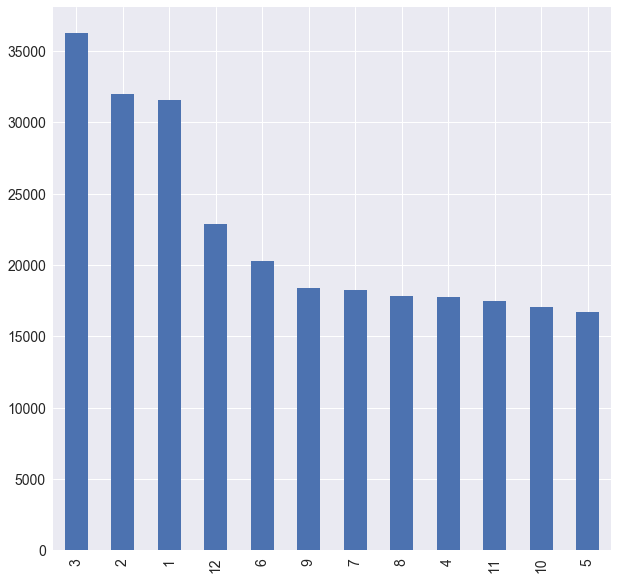

In [21]:
lq2.Month.value_counts().plot(kind='bar', figsize=(10,10), fontsize=14)

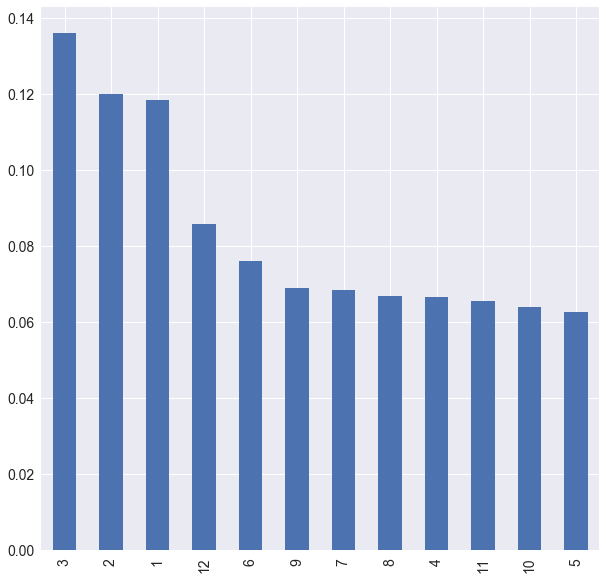

In [57]:
lq2.Month.value_counts('SaleDollars').plot(kind='bar', figsize=(10,10), fontsize=14)

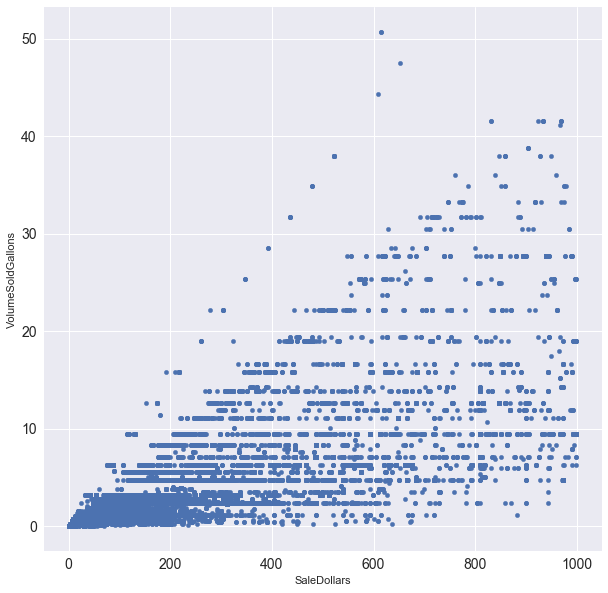

In [60]:
# compare with scatter plot
lq2.plot(x='SaleDollars',y='VolumeSoldGallons',kind='scatter', figsize=(10,10), fontsize=14)

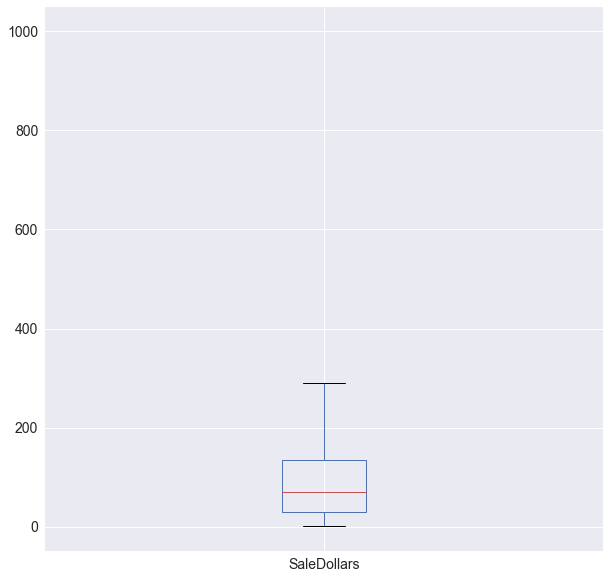

In [63]:
# reminder: box plot of beer servings
lq2.SaleDollars.plot(kind='box', figsize=(10,10), fontsize=14)

In [67]:
lq2.SaleDollars.describe()

count    266554.000000
mean        102.634284
std         112.300764
min           1.000000
25%          30.000000
50%          69.000000
75%         134.000000
max         999.000000
Name: SaleDollars, dtype: float64

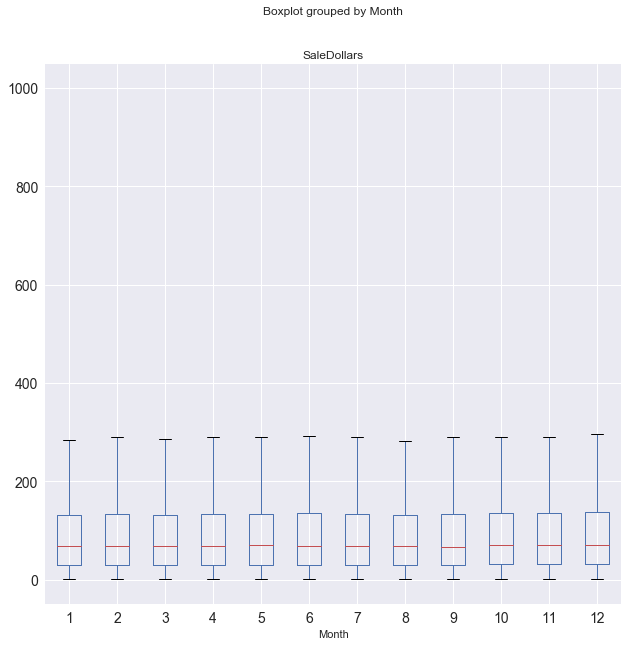

In [71]:
lq2.boxplot(column='SaleDollars', by='Month', figsize=(10,10), fontsize=14)

In [ ]:
# lq2 filtered by Date

In [23]:
lq2 = lq[(lq['Date'] > '2015-01-04') & (lq['Date'] < '2015-04-01')]

In [22]:
lq2.groupby('Date').sum()

,StoreNumber,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
Date,,,,,,,,,,,,
2015-01-05,4437276,73414,1348760639,335470,58867875,1172225,12312.79,18489.67,10935,138504,9589.72,2533.72
2015-01-06,4438788,69555,1265530345,316309,55283816,1108925,11550.56,17337.76,8828,107052,7752.82,2048.22
2015-01-07,4815928,83724,1437302041,356203,61981357,1226350,13660.98,20514.08,10872,134046,9024.57,2384.40
2015-01-08,2941618,39075,851526003,214955,43768058,721725,7804.77,11719.63,6671,86536,5729.51,1513.74
2015-01-12,3154081,52925,961472324,239635,44263163,868275,8862.12,13305.77,7997,98585,7280.96,1923.57
2015-01-13,4153220,68629,1196916074,290161,49336830,1103550,10926.95,16410.08,8689,107778,8125.41,2146.62
2015-01-14,2823243,50605,848482524,205819,40673437,734550,7569.98,11371.78,6082,71635,5106.16,1348.81
2015-01-15,2553800,33507,735679778,179839,30845606,661100,7024.96,10547.90,6339,76111,5324.51,1406.60
2015-01-16,2381735,40233,714700607,179078,32956183,653725,6628.23,9952.12,5982,73491,5362.46,1416.80


In [ ]:
# method is "n" unique, not unique
for item in lq:
    print item
    print lq[item].nunique()

In [ ]:
lq.shape

In [111]:
lq.shape

(30L,)

In [137]:
lq.dtypes

Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                      object
CountyNumber                  int32
County                       object
Category                      int32
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost             float64
StateBottleRetail           float64
BottlesSold                   int64
SaleDollars                   int32
VolumeSoldLiters            float64
VolumeSoldGallons           float64
month                         int64
dtype: object

In [126]:
# lq[['SaleDollars']].sort_values(by='Date', ascending=False)

In [36]:
#pd.set_option('display.height', 500)
#pd.set_option('display.max_rows', 500)

In [96]:
lq2.columns.values

array(['Date', 'StoreNumber', 'City', 'ZipCode', 'CountyNumber', 'County',
       'Category', 'CategoryName', 'VendorNumber', 'ItemNumber',
       'ItemDescription', 'BottleVolumeml', 'StateBottleCost',
       'StateBottleRetail', 'BottlesSold', 'SaleDollars',
       'VolumeSoldLiters', 'VolumeSoldGallons'], dtype=object)

In [ ]:
my_plot = sales_totals.sort(columns='',ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")
my_plot.set_xlabel("Date")
my_plot.set_ylabel("Sales")

In [31]:
lq.corr()

,StoreNumber,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
StoreNumber,1.000000,0.006920,-0.011762,-0.005610,-0.026910,-0.061959,-0.071617,-0.071756,0.055634,-0.024944,-0.023416,-0.023380
CountyNumber,0.006920,1.000000,-0.006565,0.001443,0.006910,-0.028452,0.010469,0.010398,0.024203,0.026090,0.006002,0.006032
Category,-0.011762,-0.006565,1.000000,0.092303,0.119985,-0.008556,-0.013502,-0.013680,-0.008423,0.007367,-0.018672,-0.018644
VendorNumber,-0.005610,0.001443,0.092303,1.000000,0.135809,0.027753,0.004227,0.003845,0.010590,-0.010551,0.010885,0.010898
ItemNumber,-0.026910,0.006910,0.119985,0.135809,1.000000,-0.058433,0.095616,0.095352,-0.013671,0.019207,-0.037662,-0.037626
BottleVolumeml,-0.061959,-0.028452,-0.008556,0.027753,-0.058433,1.000000,0.314736,0.315706,-0.105814,0.143593,0.349908,0.349330
StateBottleCost,-0.071617,0.010469,-0.013502,0.004227,0.095616,0.314736,1.000000,0.999959,-0.191250,0.294533,-0.034805,-0.034914
StateBottleRetail,-0.071756,0.010398,-0.013680,0.003845,0.095352,0.315706,0.999959,1.000000,-0.191347,0.294588,-0.034344,-0.034453
BottlesSold,0.055634,0.024203,-0.008423,0.010590,-0.013671,-0.105814,-0.191250,-0.191347,1.000000,0.620700,0.708518,0.708771
SaleDollars,-0.024944,0.026090,0.007367,-0.010551,0.019207,0.143593,0.294533,0.294588,0.620700,1.000000,0.731760,0.731899


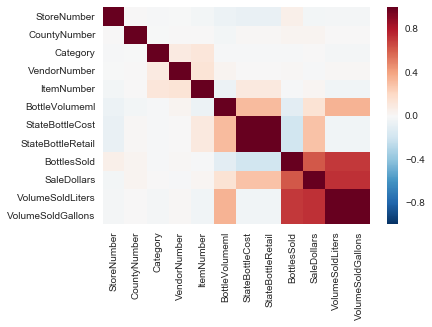

In [26]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(lq.corr())

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikes[['temp', 'atemp', 'casual']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

In [ ]:
  #Plotting practice

In [18]:
# General df check
lq2.head()

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
2733,2015-03-18,3447,SIOUX CITY,51106,97,Woodbury,1051010,AMERICAN GRAPE BRANDIES,205,52599,E & J Vs Brandy Round,1000,6.94,10.41,96,999,96.0,25.36
2734,2015-02-26,2633,DES MOINES,50320,77,Polk,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,9.25,13.88,72,999,72.0,19.02
2753,2015-03-03,3477,COUNCIL BLUFFS,51501,78,Pottawattamie,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.0,9.51
2754,2015-02-11,2642,PELLA,50219,63,Marion,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.0,9.51
2755,2015-02-05,2130,WATERLOO,50703,7,Black Hawk,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.0,9.51


In [51]:
# type check
lq2.dtypes

Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                      object
CountyNumber                  int32
County                       object
Category                      int32
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost             float64
StateBottleRetail           float64
BottlesSold                   int64
SaleDollars                   int32
VolumeSoldLiters            float64
VolumeSoldGallons           float64
dtype: object

In [97]:
# check rows to confirm date range filter is working correctly
lq2.shape

(45890, 18)

In [30]:
# column seperation
lq2[['Date','SaleDollars']].sort_values(by='Date', ascending=False)
lq2

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
2733,2015-03-18,3447,SIOUX CITY,51106,97,Woodbury,1051010,AMERICAN GRAPE BRANDIES,205,52599,E & J Vs Brandy Round,1000,6.94,10.41,96,999,96.00,25.36
2734,2015-02-26,2633,DES MOINES,50320,77,Polk,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,9.25,13.88,72,999,72.00,19.02
2753,2015-03-03,3477,COUNCIL BLUFFS,51501,78,Pottawattamie,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.00,9.51
2754,2015-02-11,2642,PELLA,50219,63,Marion,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.00,9.51
2755,2015-02-05,2130,WATERLOO,50703,7,Black Hawk,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.00,9.51
2756,2015-01-29,2106,CEDAR FALLS,50613,7,Black Hawk,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.00,9.51
2757,2015-01-22,2595,DENISON,51442,24,Crawford,1012100,CANADIAN WHISKIES,260,10808,Crown Royal Regal Apple,1000,18.50,27.75,36,999,36.00,9.51
2758,2015-01-22,4829,DES MOINES,50314,77,Polk,1012100,CANADIAN WHISKIES,260,10808,Crown Royal Regal Apple,1000,18.50,27.75,36,999,36.00,9.51
2759,2015-01-21,3773,CEDAR RAPIDS,52401,57,Linn,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.00,9.51
2760,2015-01-14,4509,AMES,50010,85,Story,1012100,CANADIAN WHISKIES,260,10808,Crown Royal Regal Apple,1000,18.50,27.75,36,999,36.00,9.51


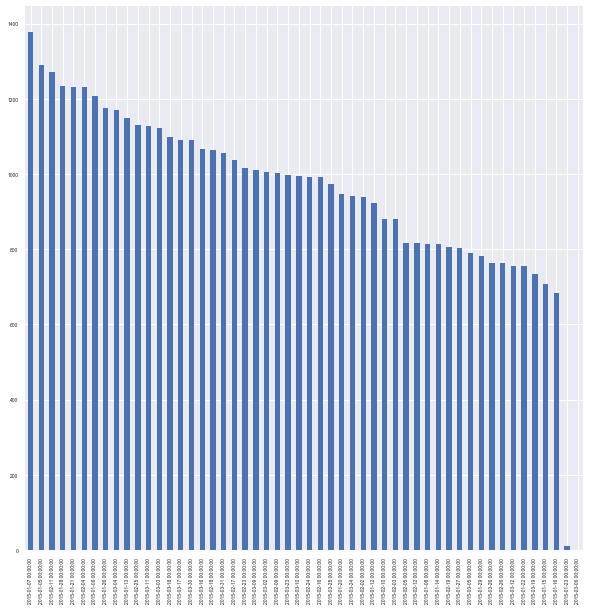

In [28]:
lq2.Date.value_counts().plot(kind='bar', figsize=(10,10), fontsize=5)

In [ ]:
df.neighborhood.value_counts().plot(kind='bar', figsize=(40,40), fontsize=25)

In [ ]:
lq2_groupby.plot(kind='bar', figsize=(30,30), fontsize=25)

In [1]:
# lq2_groupby.plt.show()

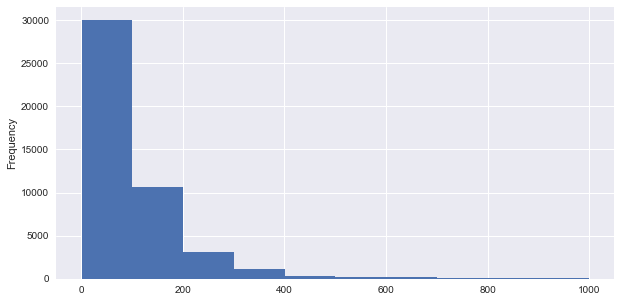

In [66]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 14
lq2.SaleDollars.plot(kind='hist', bins=10)

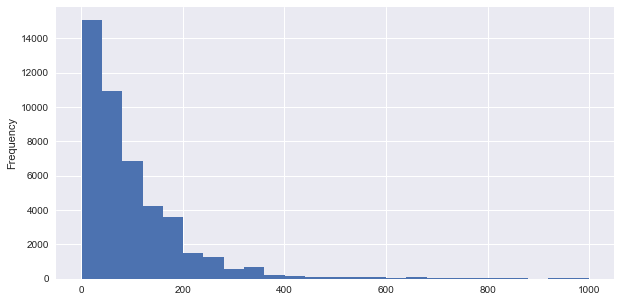

In [67]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 14
lq2.SaleDollars.plot(kind='hist', bins=25)

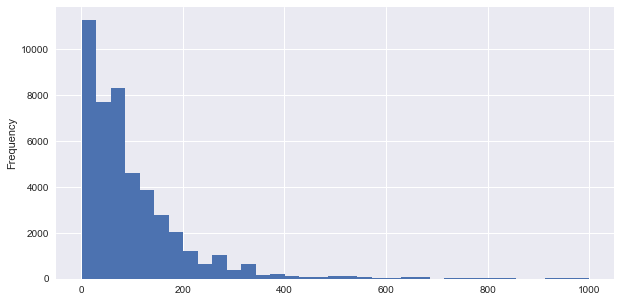

In [77]:
# Shows an interesing dip at 8k
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 14
lq2.SaleDollars.plot(kind='hist', bins=35)

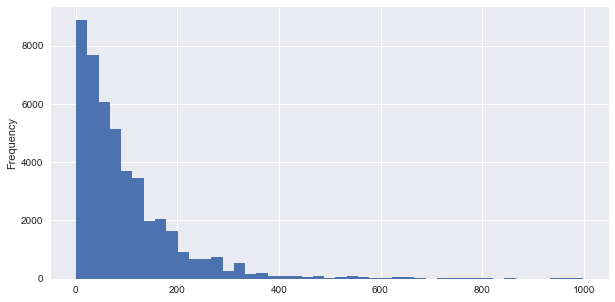

In [78]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 14
lq2.SaleDollars.plot(kind='hist', bins=45)

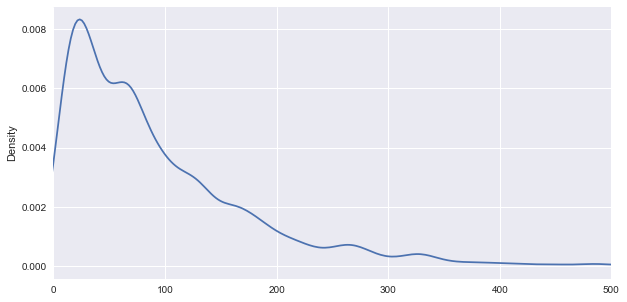

In [76]:
# compare with density plot (smooth version of a histogram)
lq2.SaleDollars.plot(kind='density', xlim=(0, 500))

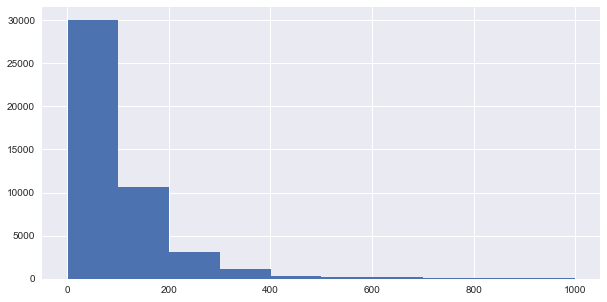

In [107]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 14
plt.figure();
lq2['SaleDollars'].hist()

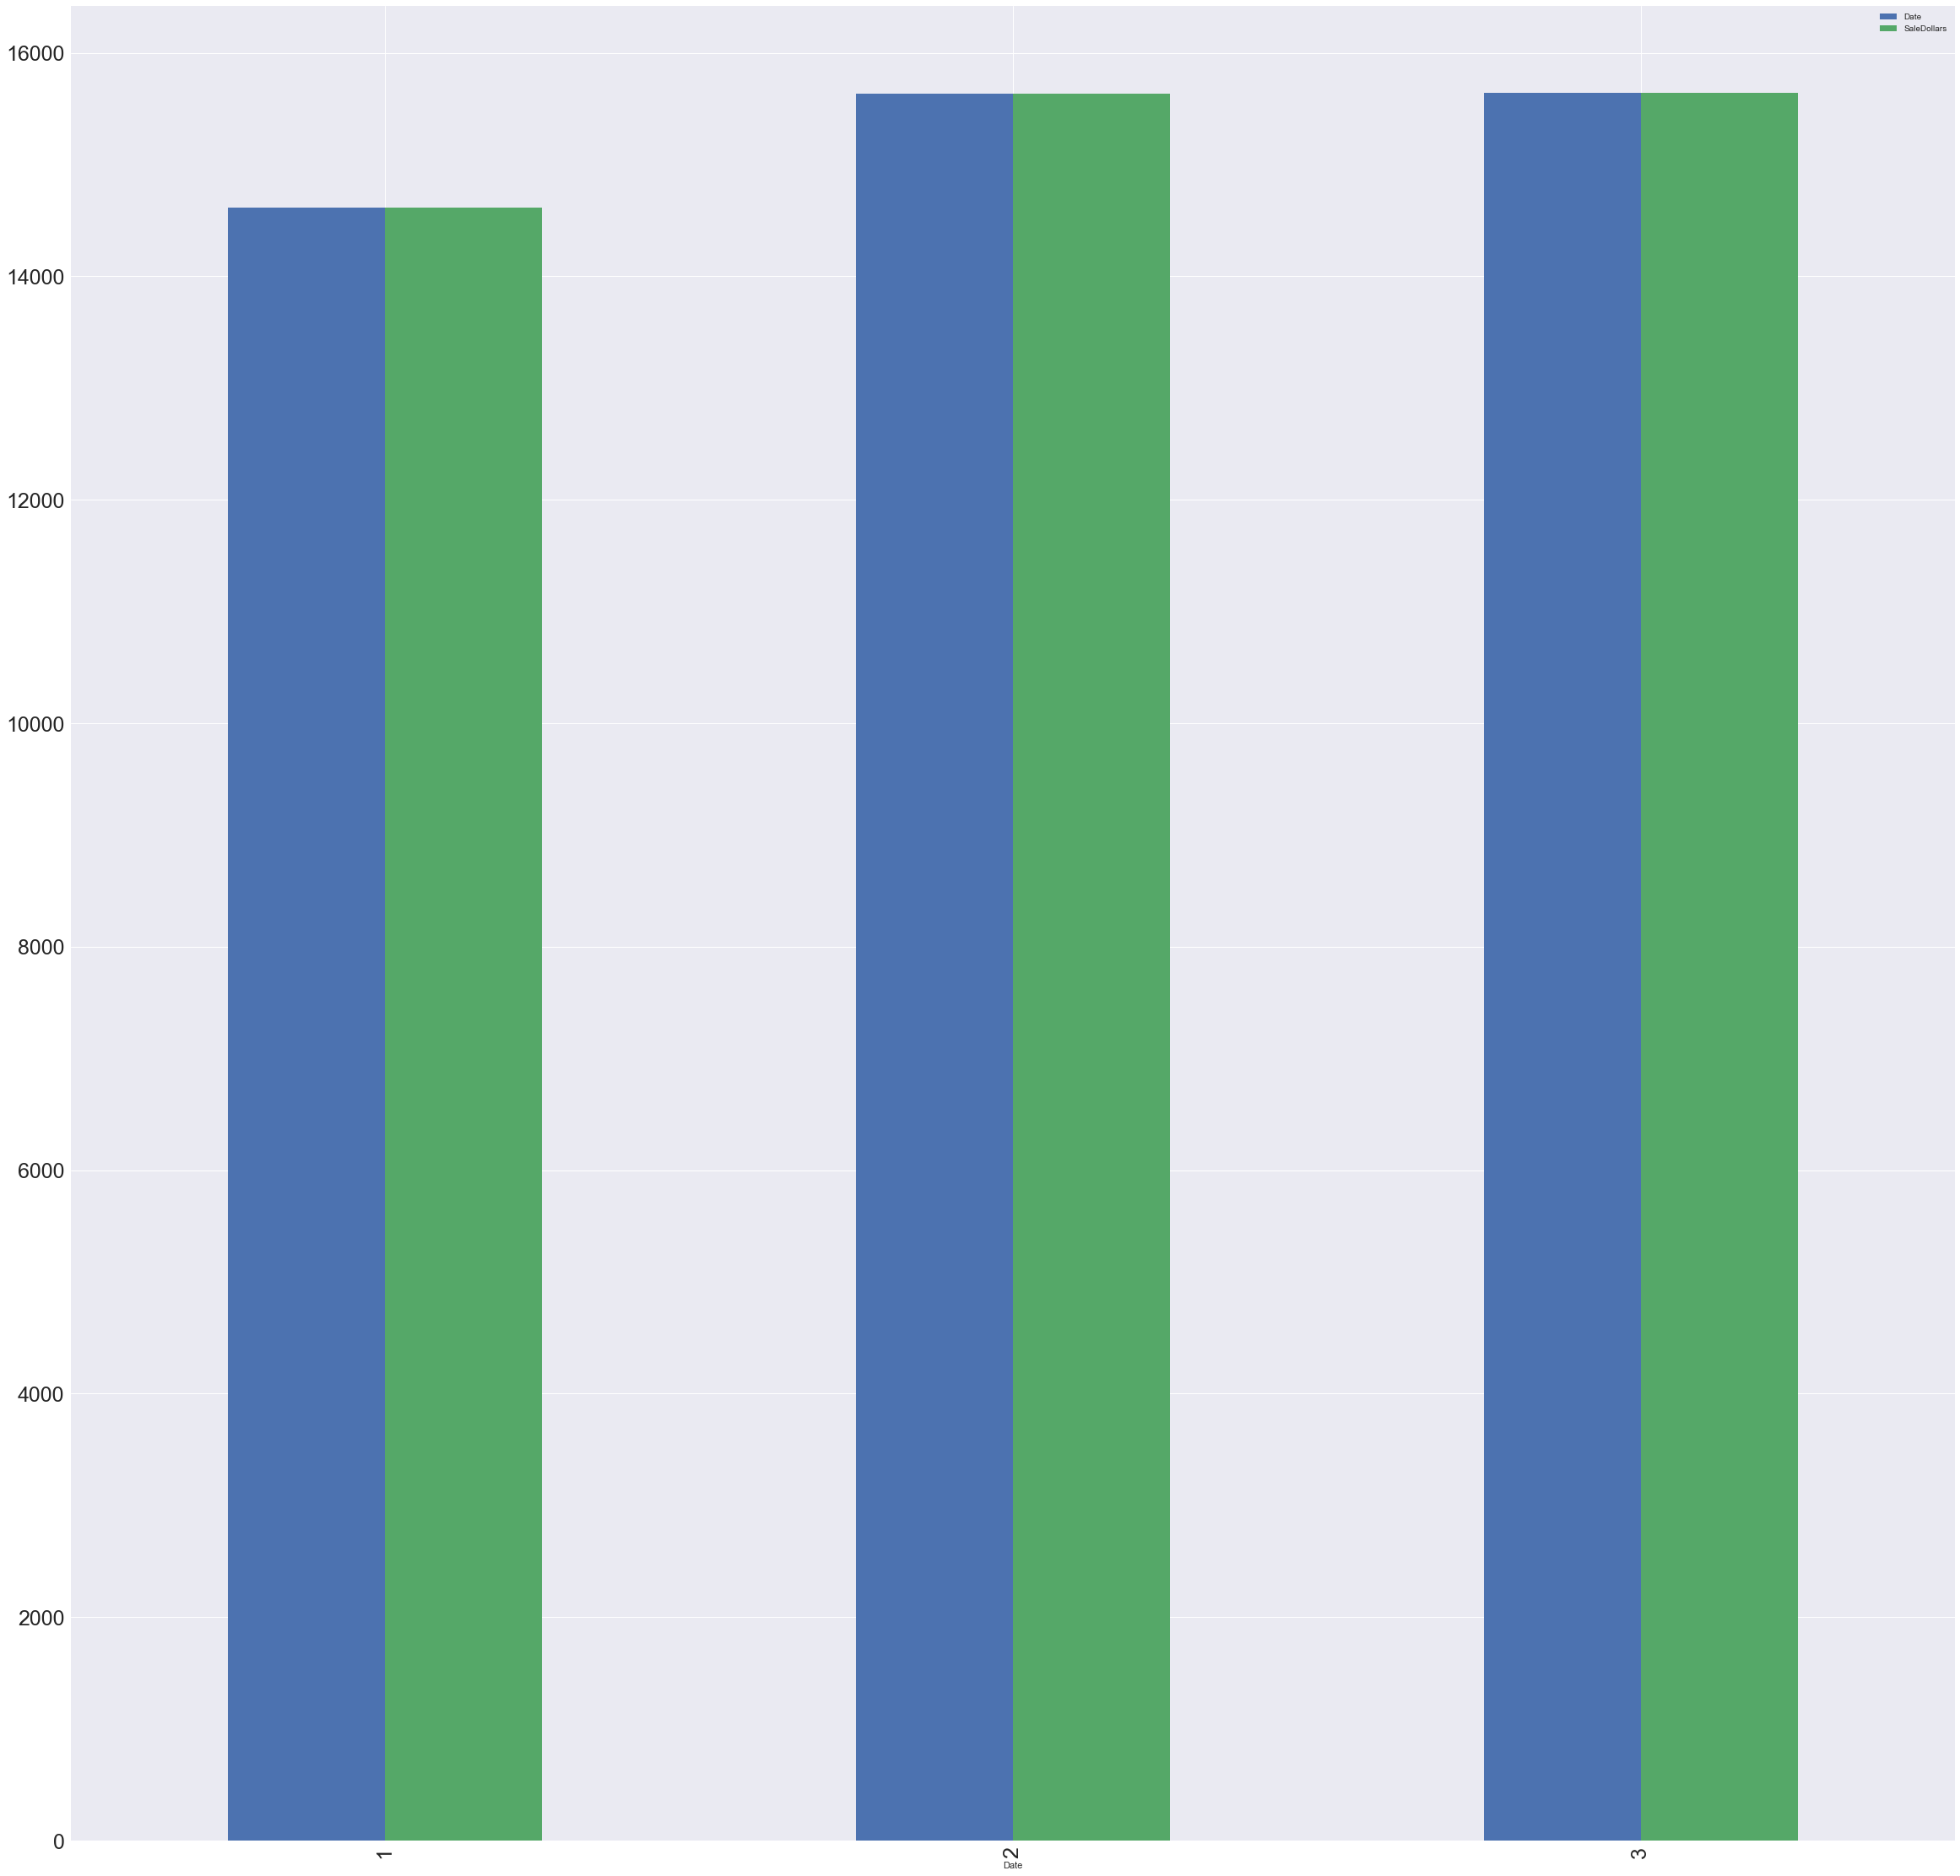

In [40]:
#lq2.groupby(df["date"].dt.month).count().plot(kind="bar")
lq2_groupby.groupby(lq2['Date'].dt.month).count().plot(kind='bar', figsize=(40,40), fontsize=25)
#lq2.SaleDollars.value_counts().plot(kind='bar', figsize=(40,40), fontsize=25)

In [2]:
# lq2_groupby.groupby(lq2['Date']).count().plot(kind='bar', figsize=(30,30), fontsize=25)

In [ ]:
lq2.groupby('Date').SaleDollars.mean()
lq2 = lq2.cumsum()
lq2.plot()

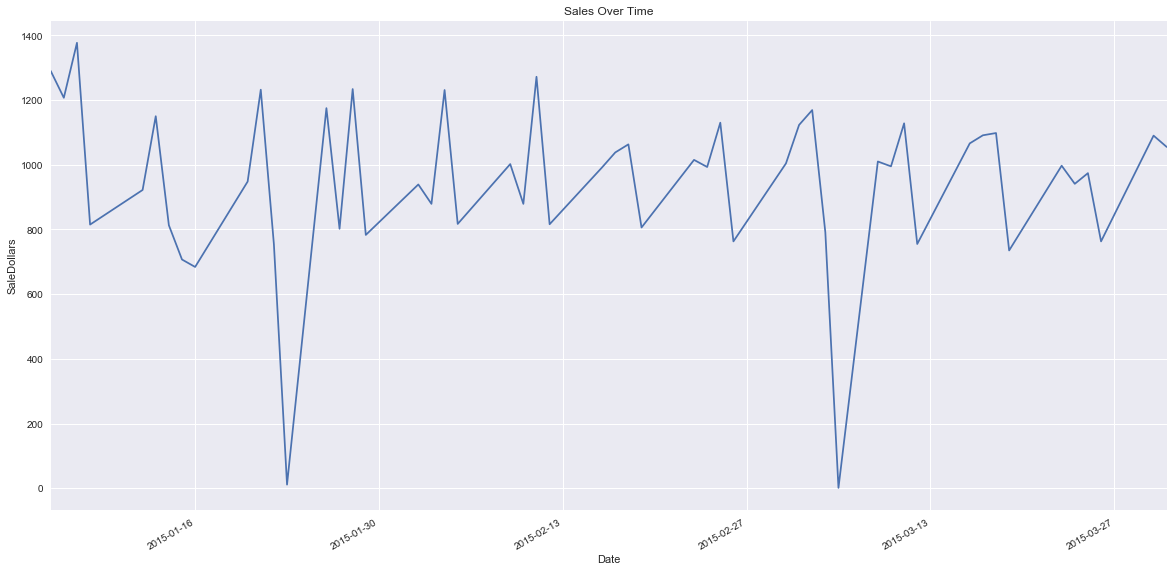

In [27]:
lq2.Date.value_counts().sort_index().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('SaleDollars')
plt.title('Sales Over Time')

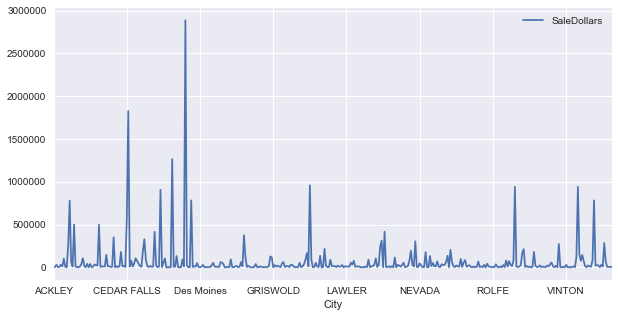

In [117]:
lq2_groupby2 = lq2[['City', 'SaleDollars']]
lq2_groupby3 = lq2_groupby2.groupby('City').sum()
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 14
#lq2_groupby2 = lq2_groupby.groupby('StoreNumber').sum()
lq2_groupby3.plot()
#lq2_groupby2.sort_values(by = 'SaleDollars', ascending=False)

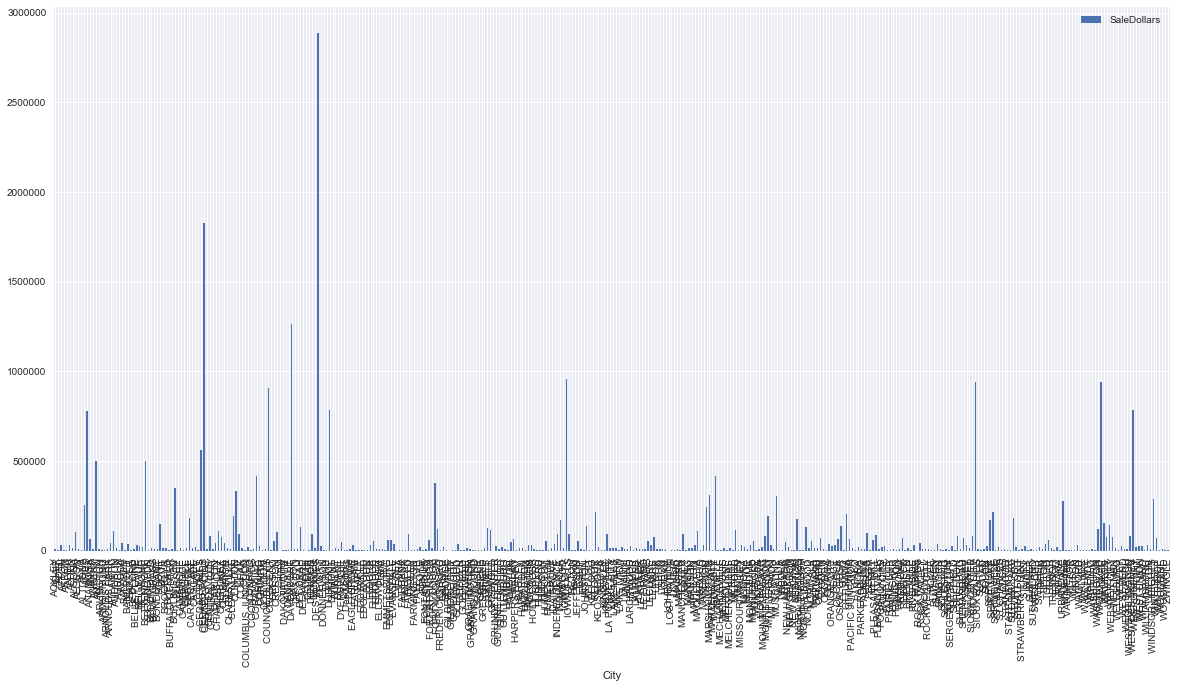

In [123]:
lq2_groupby2 = lq2[['City', 'SaleDollars']]
lq2_groupby3 = lq2_groupby2.groupby('City').sum()
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 6
#lq2_groupby2 = lq2_groupby.groupby('StoreNumber').sum()
lq2_groupby3.plot(kind = 'bar')

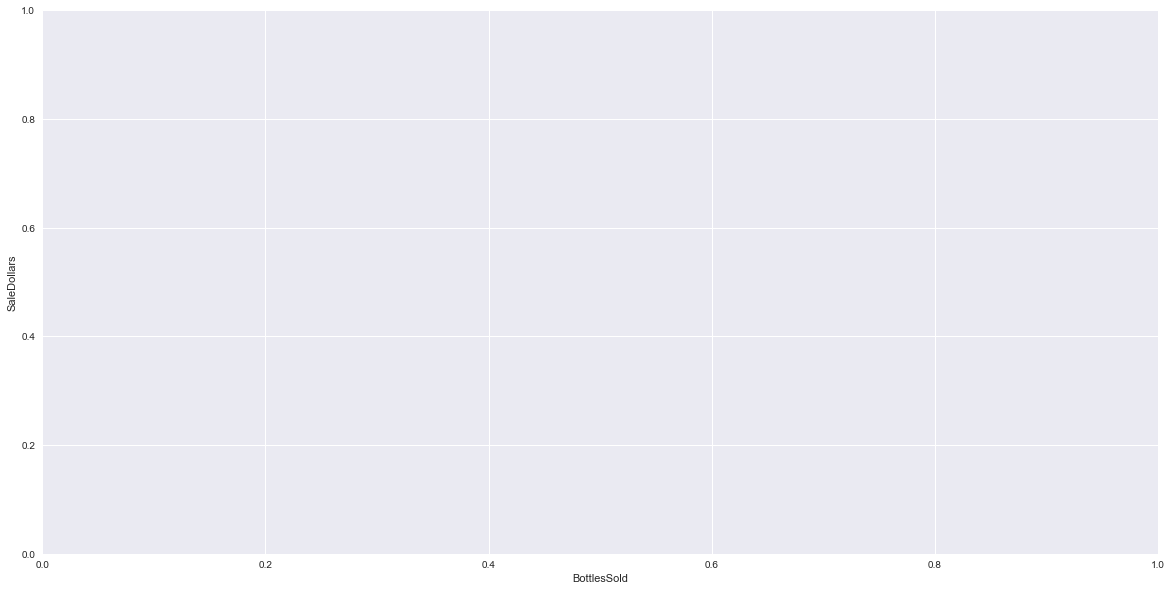

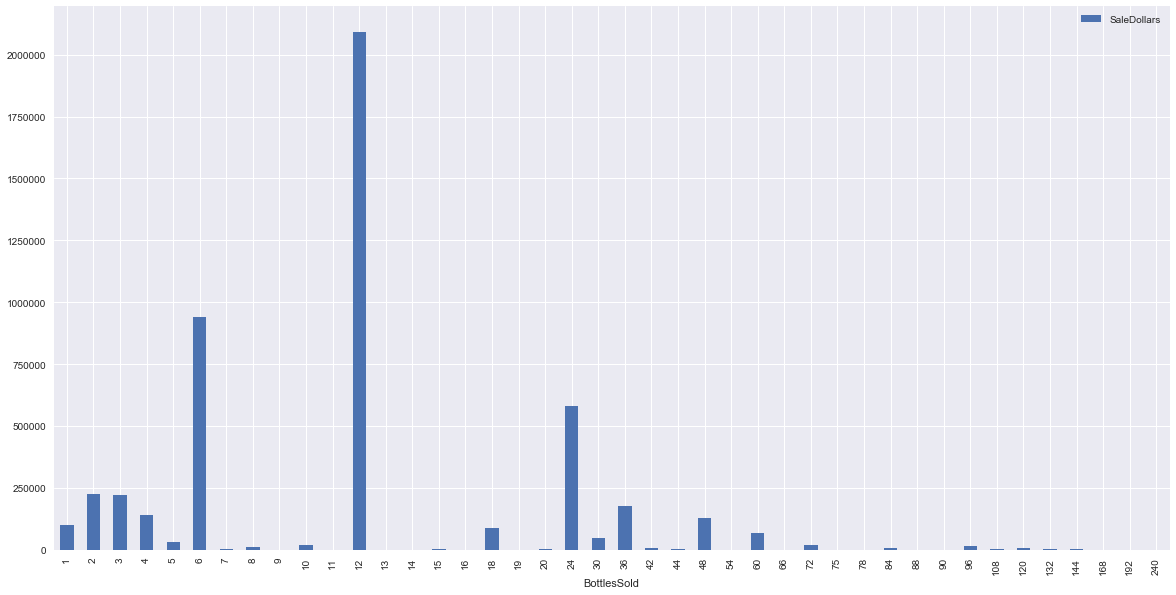

In [28]:
lq2_groupby4 = lq2[['BottlesSold', 'SaleDollars']]
lq2_groupby5 = lq2_groupby4.groupby('BottlesSold').sum()
plt.xlabel('BottlesSold')
plt.ylabel('SaleDollars')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 6
#lq2_groupby2 = lq2_groupby.groupby('StoreNumber').sum()
lq2_groupby5.plot(kind = 'bar')

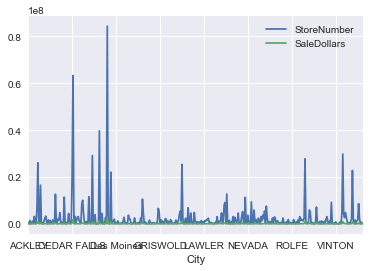

In [110]:
lq2_groupby2.plot()

In [101]:
lq2_groupby2 = lq2[['City', 'StoreNumber','SaleDollars',]]
#lq2_groupby2 = lq2_groupby.groupby('StoreNumber').sum()
lq2_groupby2 = lq2_groupby.groupby('City').sum()
lq2_groupby2.sort_values(by = 'SaleDollars', ascending=False)
#lq2_groupby2.head()
#lq2_groupby2.head()
# plt.scatter([lq2.CategoryName]), ([lq2.Date]), s=lq2.SaleDollars)

,StoreNumber,SaleDollars
City,,
DES MOINES,84348727,2886478
CEDAR RAPIDS,63217636,1826506
DAVENPORT,39721481,1264413
IOWA CITY,25357323,959235
WATERLOO,29795791,941912
SIOUX CITY,27753360,940854
COUNCIL BLUFFS,29150213,907147
DUBUQUE,22096541,783242
WEST DES MOINES,22791691,782472


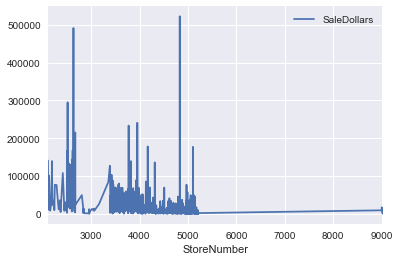

In [88]:
# lq2_groupby.plot()
lq2_groupby2.plot()

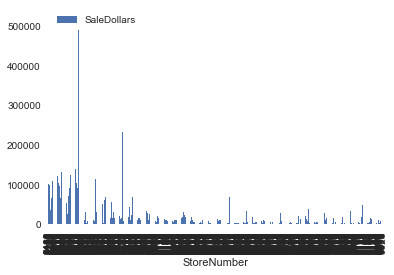

In [89]:
# lq2_groupby.plot()
lq2_groupby2.plot(kind = 'bar')

In [58]:
# column seperation for new df
lq2_groupby[['Date','SaleDollars']].sort_values(by='Date', ascending=False)

,Date,SaleDollars
138039,2015-03-26,68
14286,2015-03-26,323
166641,2015-03-26,54
167047,2015-03-26,54
167048,2015-03-26,54
167277,2015-03-26,53
167657,2015-03-26,53
168214,2015-03-26,52
168215,2015-03-26,52
168298,2015-03-26,52


In [ ]:
lq2_groupby = lq2[['SaleDollars','CategoryName',]]
lq2_groupby.head()
plt.scatter([lq2.CategoryName]), ([lq2.Date]), s=lq2.SaleDollars)

In [ ]:
#lq.groupby('Date').SaleDollars.mean()
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14
#columns = lq.columns.values
#lq = pd.Series(np.random.randn(1000), index=pd.date_range('3/1/15', periods=1000))
lq_grouped = pd.Series(index = pd.date_range('1/5/15', periods=30))
lq = lq.cumsum()
lq_grouped.plot(kind = 'bar')

In [ ]:
lq2.shape

In [105]:
lq2

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
2733,2015-03-18,3447,SIOUX CITY,51106,97,Woodbury,1051010,AMERICAN GRAPE BRANDIES,205,52599,E & J Vs Brandy Round,1000,6.94,10.41,96,999,96.00,25.36
2734,2015-02-26,2633,DES MOINES,50320,77,Polk,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,9.25,13.88,72,999,72.00,19.02
2753,2015-03-03,3477,COUNCIL BLUFFS,51501,78,Pottawattamie,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.00,9.51
2754,2015-02-11,2642,PELLA,50219,63,Marion,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.00,9.51
2755,2015-02-05,2130,WATERLOO,50703,7,Black Hawk,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.00,9.51
2756,2015-01-29,2106,CEDAR FALLS,50613,7,Black Hawk,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.00,9.51
2757,2015-01-22,2595,DENISON,51442,24,Crawford,1012100,CANADIAN WHISKIES,260,10808,Crown Royal Regal Apple,1000,18.50,27.75,36,999,36.00,9.51
2758,2015-01-22,4829,DES MOINES,50314,77,Polk,1012100,CANADIAN WHISKIES,260,10808,Crown Royal Regal Apple,1000,18.50,27.75,36,999,36.00,9.51
2759,2015-01-21,3773,CEDAR RAPIDS,52401,57,Linn,1012100,CANADIAN WHISKIES,260,11297,Crown Royal Canadian Whisky,1000,18.50,27.75,36,999,36.00,9.51
2760,2015-01-14,4509,AMES,50010,85,Story,1012100,CANADIAN WHISKIES,260,10808,Crown Royal Regal Apple,1000,18.50,27.75,36,999,36.00,9.51


In [3]:
# lq2_groupby = lq2[['Date','SaleDollars']]
# lq2_groupby.plot(kind = 'bar')

In [ ]:
lq2_groupby = lq2[['SaleDollars','CategoryName',]]
lq2_groupby.head()
lq2_groupby.plot(kind = 'bar')
plt.show()

In [ ]:
lq2.plot(kind = 'bar')
plt.show()